In [5]:
import numpy as np

In [6]:
import pandas as pd

In [7]:
import matplotlib.pyplot as plt

In [8]:
import seaborn as sns

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
from sklearn import metrics

In [12]:
data = pd.read_csv('Prediction using supervised machine learning.csv')

In [13]:
"Finished reading data"

'Finished reading data'

In [14]:
#Exploratory Data Analysis

In [15]:
data.shape #dimension of the dataframe

(25, 2)

In [16]:
data.head() 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [17]:
data.info() #to get info about variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [18]:
data.describe().T #summary statistics of the variable

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [19]:
#Data Visualisations

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

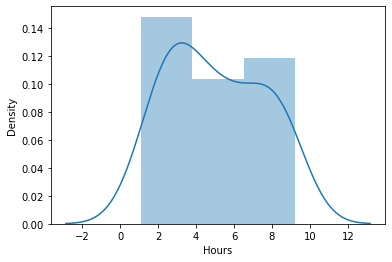

In [20]:
sns.distplot(data['Hours'], kde=True) #distribution for Hours variable

In [21]:
#Hours are partially normally distributed with students studying between 2.5 to 5/5.5 hours

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

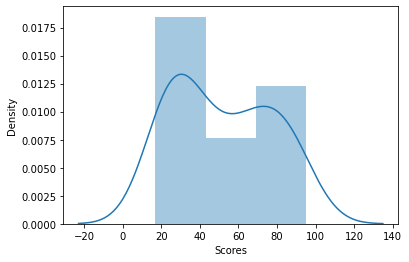

In [22]:
sns.distplot(data['Scores'], kde=True) #distribution for Scores variable

In [23]:
#Scores are partially normally distributed with most students scoring between 20 to 40 percentage

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hours'>

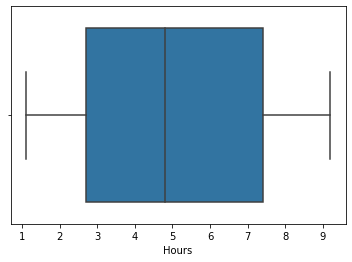

In [24]:
sns.boxplot(data['Hours']) #plotting hours to check for outliers

<AxesSubplot:>

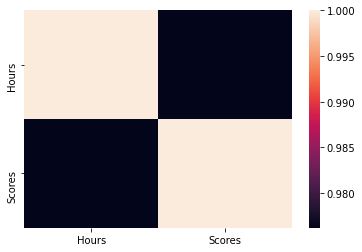

In [25]:
sns.heatmap(data.corr()) #correlation between variables

In [26]:
print(data.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [27]:
#This indicates that there is a strong positive correlation between both the variables

[Text(0.5, 1.0, 'Hours vs Scores Regression')]

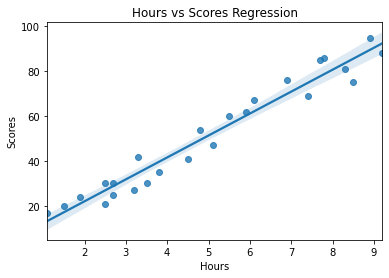

In [28]:
sns.regplot(x="Hours", y="Scores", data=data).set(title="Hours vs Scores Regression")

In [29]:
#Model Implementation

In [31]:
x = data.iloc[:, :-1].values #create matrix of independent variable

In [32]:
y = data.iloc[:, -1].values #create matrix of dependent variable

In [33]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [34]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0) #splitting data into training and test set

In [37]:
print("Training set contains {} data".format(len(x_train)))

Training set contains 20 data


In [38]:
print("Test set contains {} data".format(len(x_test)))

Test set contains 5 data


In [39]:
lrm = LinearRegression() #creating a linear regression object

In [40]:
lrm.fit(x_train, y_train) #training the regression using x_train and y_train)

LinearRegression()

In [43]:
#checking the training accuracy of the model
train_pred = lrm.predict(x_train)
train_score = metrics.r2_score(y_train, train_pred)
train_score

0.9515510725211552

In [46]:
#using the model to predict the test data
y_pred = lrm.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [49]:
#visualising the actual and the predicted values in a table, to get a sense of how well the model performed
actual_vs_pred = pd.DataFrame({'yest_test':y_test, 'y_pred':y_pred, 'residual':abs(y_test-y_pred)})
actual_vs_pred

,yest_test,y_pred,residual
0,20,16.884145,3.115855
1,27,33.732261,6.732261
2,69,75.357018,6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


In [51]:
coefficient = lrm.coef_
intercept = lrm.intercept_

In [52]:
print("Coefficient : "+str(coefficient))

Coefficient : [9.91065648]


In [53]:
print("Intercept : "+str(intercept))

Intercept : 2.018160041434683


In [55]:
#calculating the r2_score of the predicted values of the test data
pred_score = metrics.r2_score(y_test, y_pred)
pred_score

0.9454906892105356

In [ ]:
#Here, it is visible that the r2 score is very high for the test data, which indicates that the model has performed very well

In [ ]:
#Using the model to predict percentage of a student who studies for 11 hours

In [58]:
#prediction 1
hours = [11]
score = lrm.predict([hours])
print("Score : {}".format(round(score[0],2)))

Score : 111.04


In [59]:
#Hence, we can conclude that if a student studies for 11 hours, he'she is likely to score around 111.04%, as per the model